In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.metrics import accuracy_score

In [2]:
# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the softmax activation function
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Forward propagation function
def forward_propagation(X, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output):
    hidden_input = np.dot(X, weights_input_hidden) + bias_hidden
    hidden_output = sigmoid(hidden_input)
    output_input = np.dot(hidden_output, weights_hidden_output) + bias_output
    output_prob = softmax(output_input)
    return hidden_output, output_prob

# Backward propagation function
def backward_propagation(X, y_one_hot, hidden_output, output_prob,
                         weights_hidden_output, weights_input_hidden, bias_output, bias_hidden,
                         learning_rate):
    # Calculate gradients
    d_output = output_prob - y_one_hot
    d_hidden = np.dot(d_output, weights_hidden_output.T) * hidden_output * (1 - hidden_output)

    # Update weights and biases
    weights_hidden_output -= learning_rate * np.dot(hidden_output.T, d_output) / len(y_train)
    bias_output -= learning_rate * np.sum(d_output, axis=0, keepdims=True) / len(y_train)
    weights_input_hidden -= learning_rate * np.dot(X.T, d_hidden) / len(y_train)
    bias_hidden -= learning_rate * np.sum(d_hidden, axis=0, keepdims=True) / len(y_train)

    return weights_input_hidden, bias_hidden, weights_hidden_output, bias_output



In [3]:
# Load the dataset
train_data = pd.read_csv("Dataset/MNIST Handwritten Digits/train.csv")
test_data = pd.read_csv("Dataset/MNIST Handwritten Digits/test.csv")

# Extract labels and features
X_train = train_data.iloc[:, 1:].values / 255.0  # Normalize pixel values
y_train = train_data.iloc[:, 0].values



In [4]:
# Separate a validation set (you can adjust the split as needed)
validation_size = 0.2
split_index = int(validation_size * len(X_train))

X_val = X_train[:split_index]
y_val = y_train[:split_index]
X_train = X_train[split_index:]
y_train = y_train[split_index:]


In [5]:
# Define the neural network architecture
input_size = 784
hidden_size = 128
output_size = 10
learning_rate = 0.1
epochs = 200



In [11]:
# Convert labels to one-hot encoding
y_train_one_hot = np.zeros((len(y_train), output_size))
y_train_one_hot[np.arange(len(y_train)), y_train] = 1
# Convert labels to one-hot encoding for validation set
y_val_one_hot = np.zeros((len(y_val), output_size))
y_val_one_hot[np.arange(len(y_val)), y_val] = 1


In [7]:
# Initialize weights and biases
weights_input_hidden = np.random.randn(input_size, hidden_size)
bias_hidden = np.zeros((1, hidden_size))
weights_hidden_output = np.random.randn(hidden_size, output_size)
bias_output = np.zeros((1, output_size))

# Training the neural network
losses = []  # to store the loss at each epoch

for epoch in range(epochs):
    # Forward pass
    hidden_output, output_prob = forward_propagation(X_train, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output)

    # Calculate loss
    loss = -np.sum(y_train_one_hot * np.log(output_prob)) / len(y_train)
    losses.append(loss)

    # Backward pass
    weights_input_hidden, bias_hidden, weights_hidden_output, bias_output = backward_propagation(X_train, y_train_one_hot, hidden_output, output_prob, weights_hidden_output, weights_input_hidden, bias_output, bias_hidden, learning_rate)

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")



Epoch 0, Loss: 13.581725892611505
Epoch 10, Loss: 8.14131311959243
Epoch 20, Loss: 5.696877762234054
Epoch 30, Loss: 4.934135080419404
Epoch 40, Loss: 4.4436795633304795
Epoch 50, Loss: 4.039343356014337
Epoch 60, Loss: 3.70164902494327
Epoch 70, Loss: 3.417100307773386
Epoch 80, Loss: 3.1752685385275257
Epoch 90, Loss: 2.968071661078726
Epoch 100, Loss: 2.7891582435147555
Epoch 110, Loss: 2.6334529560703994
Epoch 120, Loss: 2.4968766023430917
Epoch 130, Loss: 2.376160079645814
Epoch 140, Loss: 2.268695745944859
Epoch 150, Loss: 2.1724158348585427
Epoch 160, Loss: 2.0856790786669874
Epoch 170, Loss: 2.0071696480073546
Epoch 180, Loss: 1.935818674880278
Epoch 190, Loss: 1.8707396266512462


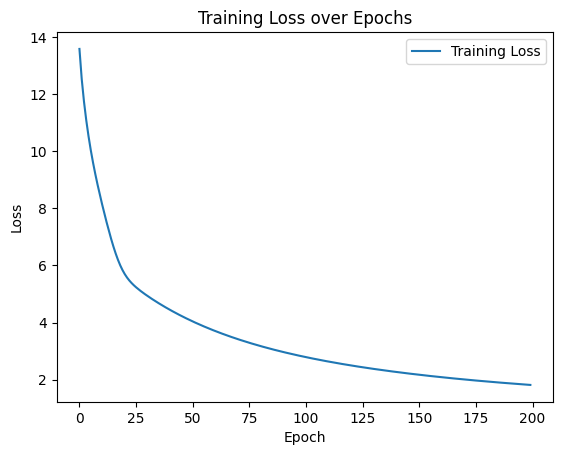

In [8]:
# Plot the loss graph
plt.plot(range(epochs), losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()



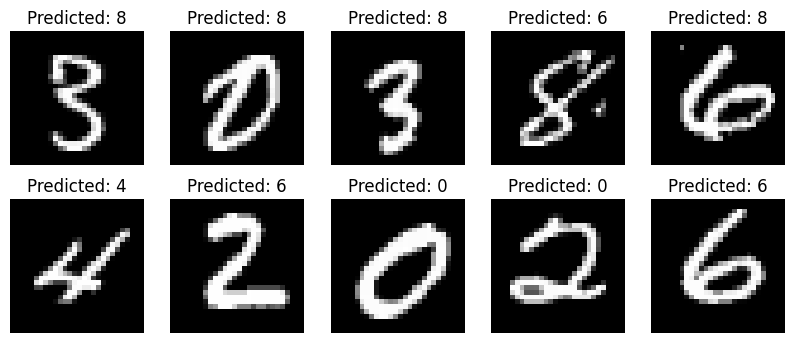

In [9]:
# Pick 10 random datapoints from the test set
random_indices = random.sample(range(len(test_data)), 10)
X_test_sample = test_data.iloc[random_indices, :].values / 255.0  # Normalize pixel values

# Predict labels for the test sample
hidden_output_test, output_prob_test = forward_propagation(X_test_sample, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output)
y_test_pred = np.argmax(output_prob_test, axis=1)

# Plot the 10 random test samples along with their predicted labels
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
axes = axes.ravel()

for i in range(10):
    img = X_test_sample[i].reshape(28, 28)
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f"Predicted: {y_test_pred[i]}")
    axes[i].axis('off')

plt.show()

In [12]:
# Evaluate on the validation set
hidden_output_val, output_prob_val = forward_propagation(X_val, weights_input_hidden, bias_hidden, weights_hidden_output, bias_output)
y_val_pred = np.argmax(output_prob_val, axis=1)

# Calculate and print accuracy on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
print("Accuracy on Validation Set:", accuracy_val)

# Calculate and print classification report on the validation set
class_report_val = classification_report(y_val, y_val_pred)
print("Classification Report on Validation Set:\n", class_report_val)

# Calculate and print ROC AUC score on the validation set
roc_auc_val = roc_auc_score(y_val_one_hot, output_prob_val, multi_class='ovr')
print("ROC AUC Score on Validation Set:", roc_auc_val)

Accuracy on Validation Set: 0.5634523809523809
Classification Report on Validation Set:
               precision    recall  f1-score   support

           0       0.70      0.72      0.71       833
           1       0.82      0.86      0.84       926
           2       0.54      0.48      0.51       883
           3       0.53      0.52      0.52       843
           4       0.51      0.50      0.50       815
           5       0.33      0.33      0.33       756
           6       0.66      0.67      0.66       839
           7       0.62      0.64      0.63       871
           8       0.48      0.48      0.48       795
           9       0.38      0.38      0.38       839

    accuracy                           0.56      8400
   macro avg       0.56      0.56      0.56      8400
weighted avg       0.56      0.56      0.56      8400

ROC AUC Score on Validation Set: 0.8859217904228014
